# Regression II: Künstliche Gehirne erzeugen für Dummies 

## Neuronale Netze mit Deep Learning Bibliotheken
In diesem Notebook wollen wir herausfinden, wie wir neuronale Netze mithilfe von Deep Learning Bibliotheken trainieren können. Konkret werden wir dazu die drei Open Source Bibliotheken Keras, Tensorflow und Pytorch verwenden. Opensource ML-Bibliotheken und Frameworks erleichtern die Implementierung und das Training von (tiefen) neuronalen Netzen enorm. In diesem Notebook wollen wir Ihnen einen generellen Überblick über die Funktionsweise dieser drei Bibliotheken/Frameworks geben. Für die nächsten Notebooks von besonderer Relevanz ist die Keras Library, da wir diese noch häufiger verwenden werden. Wenn Sie sich für die Funktionsweise der beiden anderen Bibliotheken interessieren, können Sie sich zusätzlich die beiden darauf folgenden Code-Beispiele ansehen.

### Datensatz für die Beispiele
Der Einfachheit halber werden wir für das Training aller drei Beispiel ML-Modelle den gleichen Datensatz verwenden, den wir im Folgenden in Form zweier Numpy Arrays definieren. Wie Sie vielleicht bereits bemerkt haben, handelt es sich dabei um das Ausgangsverhalten eines [XOR-Gates](https://de.wikipedia.org/wiki/Exklusiv-Oder-Gatter) (zu Deutsch: Exklusives-Oder-Gatter), das wir im Folgenden mit unseren Modellen erlenen möchten.

<img src="./images/xor_gate_aufbau.svg"
     style="width:400px;"
    />
<p style="text-align: center;">
    Von 30px MovGP0 - selbst erstellt mit Inkscape, CC BY-SA 2.0 de, https://commons.wikimedia.org/w/index.php?curid=22912763
</p>

In [16]:
import numpy as np

In [17]:
x_train = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]], dtype = 'float64')

y_train = np.array([[0],
                    [1],
                    [1],
                    [0]], dtype = 'float64')
print(x_train)
print(type(x_train))
print(y_train)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
<class 'numpy.ndarray'>
[[0.]
 [1.]
 [1.]
 [0.]]


### Keras Beispiel 

#### Über Keras

Keras ist eine Python Open-Source-Bibliothek für neuronale Netze. Sie fungiert als Schnittstelle für die TensorFlow-Bibliothek. Aufgrund ihres benutzerfreundlichen und modularen Aufbaus eignet sich Keras unter anderem besonders gut für das schnelle Experimentieren mit tiefen neuronalen Netzen. Mit nur wenigen Zeilen Code lassen sich die Schichten des neuronalen Netzes definieren, zu optimierende Verlustmetrik sowie Optimierungsverfahren festlegen und das Training starten.

<figure>
<img  src="./images/keras.png" width="100" align="center"/> 
</figure>

#### Funktionsweise
Der einfachste Weg, ein neuronales Netz in Keras zu definieren ist über die Sequential API. Dabei wird im ersten Schritt ein Sequential Modell definiert, das als eine Art Basis funktioniert. Diesem Sequential Modell können wir dann Schritt für Schritt Ebenen mit `add()` hinzufügen. In unserem Beispiel erstellen wir ein neuronales Netz bestehend aus einem Denselayer (in Keras bezeichnet Denselayer einen "fully connected Layer") mit 3 Neuronen, gefolgt von einer ReLU Aktivierungsschicht und einem weiteren Ausgangs-Denselayer mit der Sigmoid Aktivierungsfunktion. Die Sigmoid Funktion im Ausgang liefert uns einen Wertebereich zwischen null und eins.

Es sei angemerkt, dass das Modell wissen muss, welche Form der Eingabe (wie viele Dimensionen der Eingang hat) es erwarten soll. Aus diesem Grund muss die erste Schicht in einem Sequential Modell (und nur die erste, denn die folgenden Schichten können automatisch auf die Form schließen) Informationen über die Eingabeform erhalten. Dies erfolgt beispielsweise über das Festlegen des `input_dim` Arguments der ersten Schicht. Dies wird im Folgenden Beispiel umgesetzt.

Ist das Keras-Modell fertig definiert, muss es vor dem Start des Trainings noch mit der `compile()`-Methode kompiliert werden. Dazu sollten wir die zu verwendene Verlustmetrik mit `loss` sowie den Optimizer mit `optimizer` festlegen. Keras unterstützt eine Vielzahl an Optimizern, die je nach Art verschiedene Einstellungsmöglichkeiten aufweisen.
Anschließend lässt sich das Training mit der `fit()`-Methode starten.

In [18]:
# Load Library and modules
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Protobuf gencode version")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers,Input

# Init the model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(3))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

# Show optimizer
rmsprop = optimizers.RMSprop(learning_rate=0.01, rho=0.9)

# Compile
model.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])
# Train
model.fit(x_train, y_train, batch_size = 4,
          epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - accuracy: 0.7500 - loss: 0.6976
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2500 - loss: 0.6957
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.6944
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6935
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6928
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6921
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6915
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6908
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6900
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6892
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.6883
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - l

### (Optional) Tensorflow Beispiel

### Praktische Aufgabe - Nonlinear Climate Control

Im Aufgabenteil zur Regression mit neuronalen Netzen haben Sie bereits mit Daten eines Kühlsystems gearbeitet, die an dieser Stelle nochmals aufgegriffen werden.
Der Verlauf der Daten ist im folgenden nochmals dargestellt.

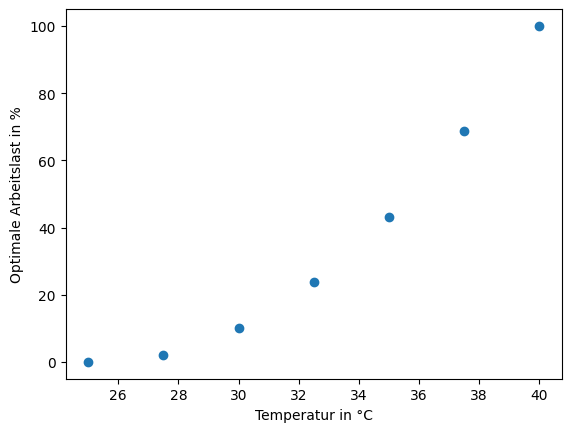

In [19]:
import matplotlib.pyplot as plt
points_climate = dict(x=[25.0, 27.5, 30.0, 32.5, 35, 37.5, 40.0], y=[0.0, 2.0, 10.0, 23.7, 43, 68.7, 100.0])
plt.figure()
plt.scatter(points_climate['x'], points_climate['y'])
plt.xlabel('Temperatur in °C')
plt.ylabel('Optimale Arbeitslast in %')
plt.show()

In [20]:
import numpy as np
mean_train_data = np.mean(points_climate['x'])
mean_train_labels = np.mean(points_climate['y'])
std_train_data = np.std(points_climate['x'])
std_train_labels = np.std(points_climate['y'])
train_data = np.array([(x-mean_train_data) / std_train_data for x in points_climate['x']], dtype = 'float64').reshape((7,1))
train_labels = np.array([(x-mean_train_labels) / std_train_labels for x in points_climate['y']], dtype = 'float64').reshape((7,1))
print(train_data)
print(train_labels)

[[-1.5]
 [-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]
 [ 1.5]]
[[-1.01480496]
 [-0.95737865]
 [-0.7276734 ]
 [-0.33430317]
 [ 0.21986073]
 [ 0.95778884]
 [ 1.85651061]]


<div class="alert alert-block alert-success">
<b>Aufgabe 4.3.1:</b> Implementieren Sie ein approximierendes Neuronales Netz mittels Keras. Das Netz soll die optimale Arbeitslast anhand der Temperatur vorhersagen. Speichern Sie das trainierte Modell in einer Variablen mit dem Namen <code>climate_model</code>.
    
Hinweise:
* Verwenden Sie die normierten Daten. 
* Verwenden Sie <code>losses.MeanSquaredError</code> als Verlustfunktion. 
* Passen Sie den Aufruf von <code>compile</code> an, sodass <code>metrics=[metrics.MeanSquaredError()]</code> übergeben wird. 
* Verwenden Sie <code>RMSprop</code> mit einer Lernrate von 0.0001. 
* Trainieren Sie 2000 Epochen mit einer Batch Size von 2. 
* Das Neuronale Netz besitzt eine verdeckte Schicht mit 2 Neuronen. 

</div>

In [31]:
# from tensorflow.keras import metrics,Input
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras import optimizers, losses
# tf.config.run_functions_eagerly(True)

# STUDENT CODE HERE
model_climate = Sequential()

model_climate.add(Input(shape=(1,)))
model_climate.add(Dense(4,activation='relu'))
model_climate.add(Dense(1))

# Show optimizer
rmsprop = optimizers.RMSprop(learning_rate=0.0005, rho=0.9)

# Compile
model_climate.compile(loss="mean_squared_error",
              optimizer=rmsprop,
              metrics=['mean_squared_error'])
# Train


history=model_climate.fit(x=train_data, y=train_labels, batch_size = 2,
          epochs=1000)
# STUDENT CODE until HERE

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8434 - mean_squared_error: 0.8434  
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8322 - mean_squared_error: 0.8322 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8228 - mean_squared_error: 0.8228 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8151 - mean_squared_error: 0.8151 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8072 - mean_squared_error: 0.8072 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8001 - mean_squared_error: 0.8001 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7923 - mean_squared_error: 0.7923 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7870 - mean_squared_error: 0.7870 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7792 - mean_squared_error: 0.7792 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7728 - mean_squared_error: 0.7728 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


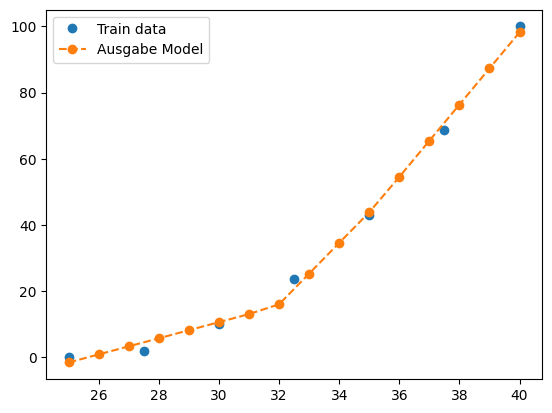

Text(0.5, 1.0, 'Training loss')

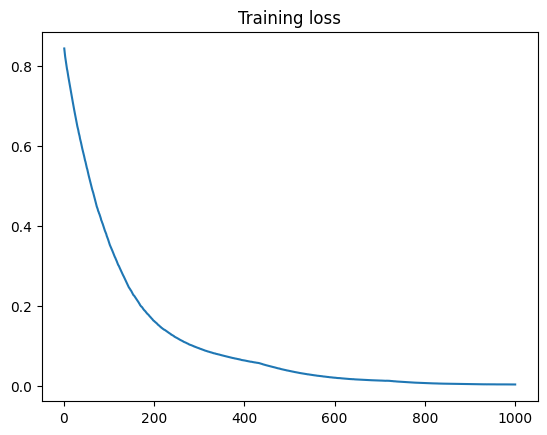

In [33]:
from tensorflow.data import Dataset
# from tensorflow.keras import metrics
x_values = [x for x in range(int(min(points_climate['x'])), int(max(points_climate['x']))+1)]
x_values_norm = np.array([ (x - mean_train_data) / std_train_data for x in x_values], dtype = 'float64').reshape((16,1))
# test_data = Dataset.from_tensor_slices(x_values).batch(2)
y_pred = model_climate.predict(x_values_norm)
y_pred_denorm = [(x*std_train_labels)+mean_train_labels for x in y_pred]

plt.figure()
plt.plot(points_climate['x'], points_climate['y'], marker='o', linestyle='None', label='Train data')
plt.plot(x_values, y_pred_denorm, label='Ausgabe Model', marker='o', linestyle='dashed')
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(1,1001,1),history.history['loss'])
plt.title("Training loss")

#### Über Tensorflow

TensorFlow ist eine Open-Source-Softwarebibliothek für die Datenflussprogrammierung und kann für eine Reihe von Aufgaben eingesetzt werden. Sie ist eine symbolische mathematische Bibliothek, die für maschinelle Lernanwendungen wie neuronale Netze verwendet wird.


<figure>
<img  src="./images/tensor-flow.png" width="100" align="center"/> 
</figure>


#### Funktionsweise
Das Definieren eines Modells in Tensorflow ist etwas umständlicher als in Keras, erlaubt es uns aber, genauere Einstellungen vorzunehmen. Im ersten Schritt definieren wir die Struktur unsere Daten mit sogenannte Placeholder mit der `tf.placeholder()` Funktion. Die Variable `phX` steht dabei für den Eingang und `phY` für den Ausgang. Beim Initialisieren dieser Placeholder können wir sowohl den Datentyp, in unserem Fall float32, als auch die Form der Daten (engl. shape) festlegen. In diesem Beispiel ist unser Eingang zweidimensional und unser Ausgang eindimensional, weshalb wir hier für `phX` 2 und `phY` 1 wählen. Das `None` an erster Stelle der Shape bedeutet dabei, dass die erste Dimension, die der Batch-Größe entspricht, eine beliebige Größe haben kann.

Als nächstes initialisieren wir die Gewichte und Bias unseres Netzes mit zufälligen Startwerten. Beachten Sie, dass `w1` und `w2` bzw. `b1` und `b2` Matrizen sind, also mehrere Gewichte/Bias für einen Layer in einer Variablen vereinen.

Diese initialisierten Gewichte und Bias können wir dann an die Feed-Forward Funktion `forward()` übergeben, in der wir den mathematische Zusammenhang zwischen Ein- und Ausgang in unserem Tensorflow-Netz definieren. In diesem Fall definieren wir ein Modell mit zwei Schichten. Der Ausgang beider Schichten ergibt sich jeweils durch Matrixmultiplikation (`tf.matmul()`) von Schichteingang und Gewichten der jeweiligen Schicht und anschließender Addition mit den Bias. In der ersten Schicht wird außerdem wieder die Sigmoid Funktion auf den Ausgang angewendet, während für die Ausgangsschicht die Softmax Funktion verwendet wird (hier direkt beim Berechnen der Kosten `cost`).

Ähnlich wie beim Training mit Keras müssen wir auch bei Tensorflow Lernrate, die Anzahl an Epochen, die zu minimierende Kostenfunktion sowie das Optimierungsverfahren spezifizieren. Das Training kann anschließend durch das Erstellen einer neuen Session begonnen werden. In der anschließenden For-Loop führen wir die Session mit dem `run()` Befehl so häufig aus, wie durch die `nb_epochs` Variable spezifiziert, sodass wir das Training für die gewünschte Epochenanzahl durchführen.


In [35]:
# Import tensorflow
import tensorflow as tf

# Feedforward function
def forward(x, w1, b1, w2, b2):
    
    Z = tf.nn.relu(tf.matmul(x,w1) + b1)
    Z2 = tf.matmul(Z,w2) + b2
    
    return Z2
    
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev = 0.1))


# Define PlaceHolder for input x_train and output y_train
try:
    phX = tf.placeholder(tf.float32, [None, 2])
    phY = tf.placeholder(tf.float32, [None, 1])
except AttributeError:
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior() 
    phX = tf.placeholder(tf.float32, [None, 2])
    phY = tf.placeholder(tf.float32, [None, 1])
    
# Init weights
w1 = init_weights([2, 3])
b1 = init_weights([3])
w2 = init_weights([3, 1])
b2 = init_weights([1])

y_pred = forward(phX, w1, b1, w2, b2)

lr = 0.1
nb_epochs = 201

# Init cost function
cost = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=y_pred, labels=phY))

# Init optimizer
train = tf.train.AdamOptimizer(lr).minimize(cost)

# Create session and init variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Start training
for i in range(nb_epochs):
    sess.run(train, feed_dict={phX: x_train, phY: y_train})
    c = sess.run(cost, feed_dict={phX: x_train, phY: y_train})
    if i%50 == 0:
        print("Iteration {: >8}  |  Cost: {}".format(i,c))


Instructions for updating:
non-resource variables are not supported in the long term

Iteration        0  |  Cost: 0.6931910514831543
Iteration       50  |  Cost: 0.6931482553482056
Iteration      100  |  Cost: 0.6931471824645996
Iteration      150  |  Cost: 0.6931471824645996
Iteration      200  |  Cost: 0.6931471824645996


#### Über Pytorch
PyTorch ist eine Open-Source-Bibliothek für maschinelles Lernen, die auf der Torch-Bibliothek basiert. Sie wird für Anwendungen wie Computer Vision und Verarbeitung natürlicher Sprache verwendet und hauptsächlich von Facebooks AI Research Lab entwickelt. Auch Pytorch ist ein kostenloses Opensource Projekt. Unterscheidungsmerkmal zu den vorherigen Bibliotheken ist die durchgängige Anwendung der Objektorientierung.
<figure>
<img  src="./images/pytorch.png" width="100" align="center"/> 
</figure>

#### Funktionsweise
Zunächst definieren wir eine neue Klasse `Net` die unser neuronales Netz repräsentiert. In der Init-Methode (Konstruktor) dieser Klasse initialisieren wir die beiden Schichten unseres Netzes. Anders als im vorherigen Tensorflow Beispiel müssen wir dabei die Shapes der beiden Schichten explizit angeben. In diesem Beispiel verwenden wir die [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) Klasse, die eine lineare Transformation der Form  $y=xA^T+b$ durchführt. So können wir direkt unsere beiden Schichten `fc1` und `fc2` definieren. Wie auch bei der Tensorflow Implementation benötigen wir eine `forward` Methode, die uns den Ausgang des Netzes berechnet. Wir versehen den Ausgang der ersten Schicht `fc1` erneut mit der ReLU Funktion und geben diesen auf die zweite Schicht `fc2`. Auf den Ausgang dieser zweiten Schicht wenden wir dann die Sigmoid Aktivierungsfunktion an.

Auch anders als bei der Implementation mit Tensorflow ist, dass wir beim Verwenden von Pytorch Torch Tensoren als Eingänge benötigen. Daher konvertieren wir unsere Numpy Trainingsdaten entsprechend. 

Auch hier können wir wichtige Einstellungen wie die Festlegung des Optimizers und der Verlustmetrik vornehmen, ehe wir mit dem Training beginnen.

Während des Trainings innerhalb der For-Loop erfolgt jede Aktualisierung des Modells nach dem gleichen Muster:

- Löschen des letzten Fehlergradienten: `optimizer.zero_grad()`
- Ein Vorwärtsdurchlauf (feedforward) der Eingabe durch das Modell: `net(input)`
- Berechnung des Verlusts für die Modellausgabe: `criterion(output, target)`
- Backpropagation des Fehlers durch das Modell: `loss.backward()`
- Aktualisieren des Modells, um den Verlust zu reduzieren: `optimizer.step()`

Anders als bei der Tensorflow Implementation verschachteln wir dabei zwei For-Loops ineinander. Die innere Schleife füttert das Netz dabei jeweils mit einem einzelnen Eintrag aus unserem Datensatz (`input` und `target`), während die äußere Schleife die aktuelle Epoche steuert (`idx`).



### (Optional) Pytorch Beispiel

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3, True)
        self.fc2 = nn.Linear(3, 1, True)

    def forward(self, x:float) -> float:
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

net = Net()

inputs = torch.from_numpy(x_train).type(torch.FloatTensor)
targets = torch.from_numpy(y_train).type(torch.FloatTensor)

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

print("Training loop:")
for idx in range(0, 201):
    for input, target in zip(inputs, targets):
        optimizer.zero_grad()   # zero the gradient buffers
        output = net(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()    # Does the update
    if idx % 50 == 0:
        print("Epoch: {: >8}  |  Loss: {}".format(idx, loss.data.numpy()))

Training loop:
Epoch:        0  |  Loss: 0.7421236634254456
Epoch:       50  |  Loss: 0.7264403104782104
Epoch:      100  |  Loss: 0.8102656006813049
Epoch:      150  |  Loss: 0.7227125763893127
Epoch:      200  |  Loss: 0.3888893723487854
